In [1]:
# author: René Kopeinig
# script: Display Proba-V Time-Series
# description: Display Proba-V NDVI (Normalized Difference Vegetation Index) Time-Series with 
#              help of Google Earth Engine Python API.
#              Note: Please make sure you have all dependencies in Python installed and you are signed up for Google Earth Engine.

In [2]:
# Add IPython-specific directive to display plots directly below the notebook cell
%matplotlib inline

In [3]:
# Import Dependencies
import ee, datetime
import pandas as pd
import matplotlib.dates as mdates
from IPython.display import Image
from matplotlib import dates
from pylab import *

ee.Initialize()

In [1]:
# Create image collection
collection = ee.ImageCollection('VITO/PROBAV/C1/S1_TOC_100M')

# Create point in Luxembourg (Proba-V Footprint: X18Y02)
point = {'type':'Point', 'coordinates':[-99.545934,20.572173]};

NameError: name 'ee' is not defined

In [5]:
#Retrieve information over image collection
info = collection.getRegion(point,500).getInfo()

In [6]:
# Reshape image collection 
header = info[0]
data = array(info[1:])

iTime = header.index('time')
time = [datetime.datetime.fromtimestamp(i/1000) for i in (data[0:,iTime].astype(int))]

# List of used image bands
band_list = ['RED',u'NIR']

iBands = [header.index(b) for b in band_list]
yData = data[0:,iBands].astype(np.float)

In [7]:
# Calculate NDVI
red = yData[:,0]
nir = yData[:,1]
ndvi = (nir - red) / (nir + red)

In [8]:
# Reshape NDVI array into Pandas Dataframe
df = pd.DataFrame(data=ndvi, index=list(range(len(ndvi))), columns=['NDVI'])
df = df.interpolate()
df['DateTime'] = pd.Series(time, index=df.index)

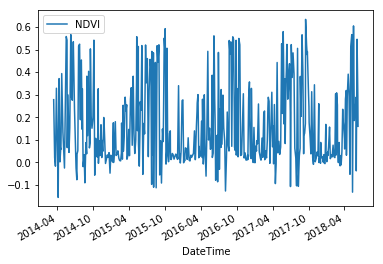

In [9]:
# Plot NDVI Time-Series for the selected location in Luxembourg
df.plot(y='NDVI',x='DateTime')
plt.show()